In [2]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import imghdr
import pathlib as path

# New Section

In [3]:
gpus=tf.config.experimental.list_physical_devices('CPU')

In [4]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
data_dir= 'data'

In [11]:
data_dir

'data'

In [12]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'RBC', 'CIBC', 'BMO']

# New Section

In [13]:
os.listdir(os.path.join(data_dir,'BMO'))

['BMO01.jpg', 'BMO03.jpg', 'BMO02.jpg']

In [14]:
for image_class in os.listdir(data_dir):
  print(image_class)

.ipynb_checkpoints
RBC
CIBC
BMO


In [15]:
for image in os.listdir(os.path.join(data_dir,image_class)):
  print(image)


BMO01.jpg
BMO03.jpg
BMO02.jpg


In [16]:
img = cv2.imread(os.path.join('data','BMO','BMO01.jpg'))
img

array([[[237, 237, 237],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [229, 229, 229],
        [229, 229, 229],
        [229, 229, 229]],

       [[243, 243, 243],
        [241, 241, 241],
        [240, 240, 240],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[248, 248, 248],
        [247, 247, 247],
        [246, 246, 246],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [17]:
img.shape

(334, 958, 3)

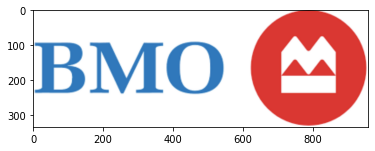

In [18]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [20]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 10 files belonging to 4 classes.


In [21]:
data_iterator=data.as_numpy_iterator()

In [22]:
batch=data_iterator.next()

In [23]:
batch

(array([[[[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         ...,
 
         [[255.      , 255.      , 255.      ],
          [255.   

In [24]:
# Images as numpy arrays
batch[0].shape

(10, 256, 256, 3)

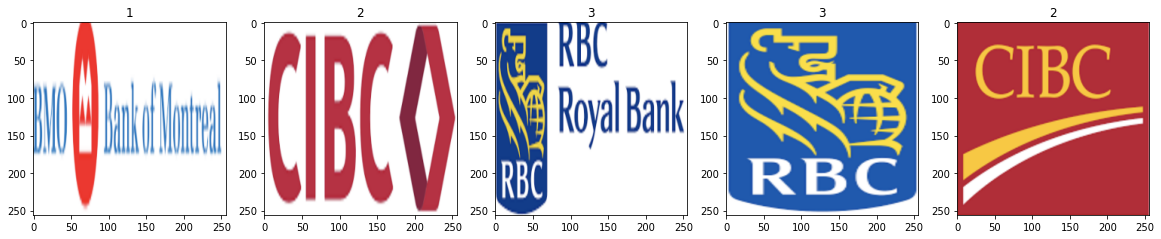

In [25]:
fig,ax=plt.subplots(ncols=5,figsize=(20,20))
for idx,img in enumerate(batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [26]:
scaled = batch[0]/255

In [27]:
scaled.max()

1.0

In [28]:
data = data.map(lambda x,y: (x/255,y))

In [29]:
scaled_interator = data.as_numpy_iterator()

In [30]:
batch = scaled_interator.next()

In [31]:
batch[0].max()

1.0

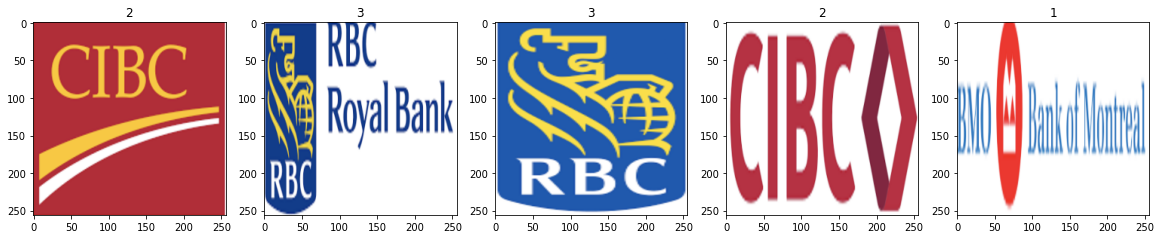

In [32]:
fig,ax=plt.subplots(ncols=5,figsize=(20,20))
for idx,img in enumerate(batch[0][:5]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
#Train the model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Dropout

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])